<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [266]:
data = pd.read_csv('train.csv')
data.shape
train = data.iloc[0:20,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [267]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

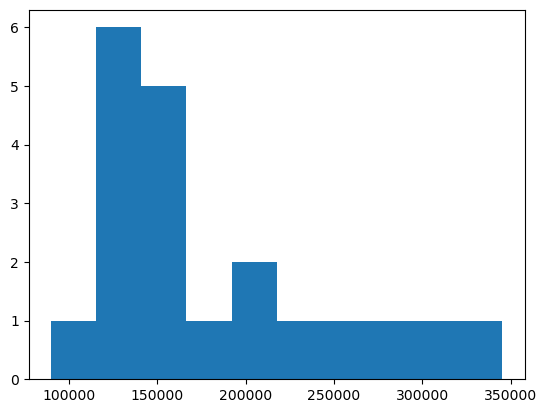

In [268]:
# plot hist
plt.hist(train['SalePrice'])

In [269]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 38)

In [270]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
# cast to list
cols = cols.tolist()
cols

['SalePrice', 'OverallQual', 'MasVnrArea']

In [271]:
# pick out X cols and Y = SalePrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [272]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [273]:
# How good is the model
model.score(X,Y)


0.7501993255220817

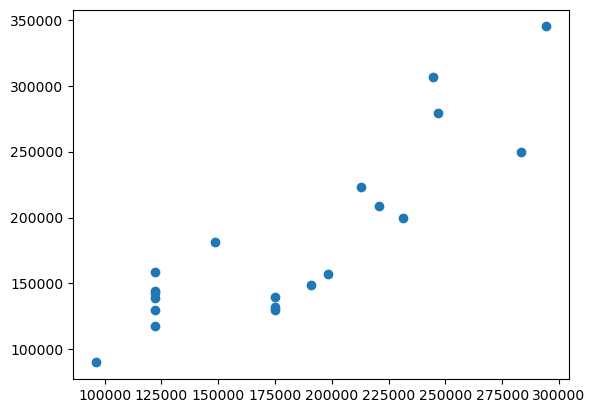

In [274]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

My code to create Predictive model using first 1000 rows of train.csv

In [275]:
# take first 1000 rows from train.csv as training data
train = data.iloc[0:1000,:]
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [276]:
# remove non-numeric columns
train = train.select_dtypes(include=[np.number])

# skip over NaN values
train = train.fillna(0)

# remove Id, MoSold, YrSold columns
train = train.drop(['Id', 'MoSold', 'YrSold'], axis = 1)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,836,192,84,0,0,0,0,0,250000


In [277]:
# split into X and Y
Y = train['SalePrice']
X = train.drop(['SalePrice'], axis = 1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2003.0,2,548,0,61,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1976.0,2,460,298,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2001.0,2,608,0,42,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1998.0,3,642,0,35,272,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2000.0,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,51.0,4712,4,7,1946,1950,0.0,384,0,...,1946.0,1,305,0,57,0,0,63,0,0
996,20,0.0,10659,5,6,1961,1961,0.0,915,0,...,1961.0,1,368,0,319,0,0,0,0,0
997,20,0.0,11717,6,6,1970,1970,571.0,0,0,...,1970.0,2,615,371,0,0,0,0,0,0
998,30,60.0,9786,3,4,1922,1950,0.0,0,0,...,1922.0,1,210,0,100,48,0,0,0,0


In [278]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [279]:
# train model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)

# assess model
model.score(X,Y)


0.8546141842780373

Predict prices for test data

In [280]:
# import test data
test = pd.read_csv('test.csv')

# transform test data to json
test.to_json('housedata_test.json')

# remove non-numeric columns
test = test.select_dtypes(include=[np.number])

# skip over NaN values but don't drop them
test = test.fillna(0)

# remove MoSold, YrSold columns
test = test.drop(['MoSold', 'YrSold'], axis = 1)
test.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1001,20,74.0,10206,3,3,1952,1952,0.0,0,...,1956.0,2,528,0,0,0,0,0,0,0
1,1002,30,60.0,5400,5,6,1920,1950,0.0,0,...,1920.0,1,216,0,20,94,0,0,0,0
2,1003,20,75.0,11957,8,5,2006,2006,53.0,24,...,2006.0,3,824,144,104,0,0,0,0,0
3,1004,90,0.0,11500,5,6,1976,1976,164.0,0,...,1976.0,2,528,0,0,0,0,0,0,0
4,1005,120,43.0,3182,7,5,2005,2006,16.0,16,...,2005.0,2,457,156,0,0,0,0,0,0


(array([ 24., 170., 167.,  73.,  22.,   1.,   2.,   0.,   0.,   1.]),
 array([  2500.02,  78067.56, 153635.1 , 229202.64, 304770.18, 380337.72,
        455905.26, 531472.8 , 607040.34, 682607.88, 758175.42]),
 <BarContainer object of 10 artists>)

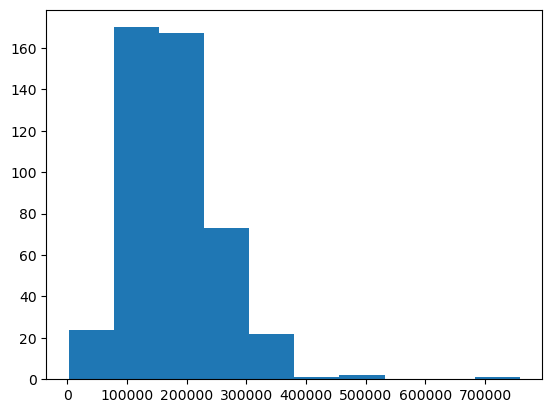

In [281]:
# set X for test data to be everything but iD  
X_test = test.drop(['Id'], axis = 1)

# normalize test data
X_test = scaler.transform(X_test)

# predict
predictions = model.predict(X_test)

# convert predictions to a float with 2 decimal places
predictions = np.round(predictions, 2)
predictions

# plot predictions
plt.hist(predictions)

In [282]:
# create CSV file with id #s and predictions
id = test['Id']
predictions = pd.DataFrame({'Id': id, 'SalePrice': predictions})

# write to CSV file
predictions.to_csv('predictions.csv', index = False)